In [1]:
!git clone https://github.com/sevamoo/SOMPY.git

Cloning into 'SOMPY'...
remote: Enumerating objects: 947, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 947 (delta 20), reused 27 (delta 15), pack-reused 906 (from 1)
Receiving objects: 100% (947/947), 10.15 MiB | 14.86 MiB/s, done.
Resolving deltas: 100% (512/512), done.


In [2]:
!pip install ipdb
!pip install numexpr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.2 MB/s eta 0:00:00


In [3]:
import sys
sys.path.append('/content/SOMPY')  # Add the SOMPY folder to the Python path

import sompy  # Now you can import sompy

NumExpr defaulting to 2 threads.


In [4]:
from IPython.display import YouTubeVideo

from os.path import join
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier

from sompy.sompy import SOM
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
from sklearn.preprocessing import StandardScaler

In [5]:
df=pd.read_csv('df_PCA.csv',delimiter=',')

In [6]:
df.set_index('customer_id',inplace=True)

In [7]:
np.random.seed(42)

In [17]:

sm = sompy.SOMFactory().build(
    df.values,
    mapsize=[50, 50],
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=df.columns
)
sm.train(n_job=1, verbose='info', train_rough_len=1500, train_finetune_len=10000)

A saída de streaming foi truncada nas últimas 5000 linhas.
 epoch: 7502 ---> elapsed time:  2.680000, quantization error: 2.481400

 epoch: 7503 ---> elapsed time:  2.598000, quantization error: 2.481177

 epoch: 7504 ---> elapsed time:  2.920000, quantization error: 2.480950

 epoch: 7505 ---> elapsed time:  4.284000, quantization error: 2.480692

 epoch: 7506 ---> elapsed time:  2.592000, quantization error: 2.480448

 epoch: 7507 ---> elapsed time:  2.643000, quantization error: 2.480202

 epoch: 7508 ---> elapsed time:  2.639000, quantization error: 2.479971

 epoch: 7509 ---> elapsed time:  4.260000, quantization error: 2.479733

 epoch: 7510 ---> elapsed time:  2.731000, quantization error: 2.479499

 epoch: 7511 ---> elapsed time:  2.634000, quantization error: 2.479272

 epoch: 7512 ---> elapsed time:  2.611000, quantization error: 2.479051

 epoch: 7513 ---> elapsed time:  2.841000, quantization error: 2.478829

 epoch: 7514 ---> elapsed time:  4.291000, quantization error: 2.

/content/SOMPY/sompy/visualization/umatrix.py:60: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X, Y, s=2, alpha=1., c='Gray',


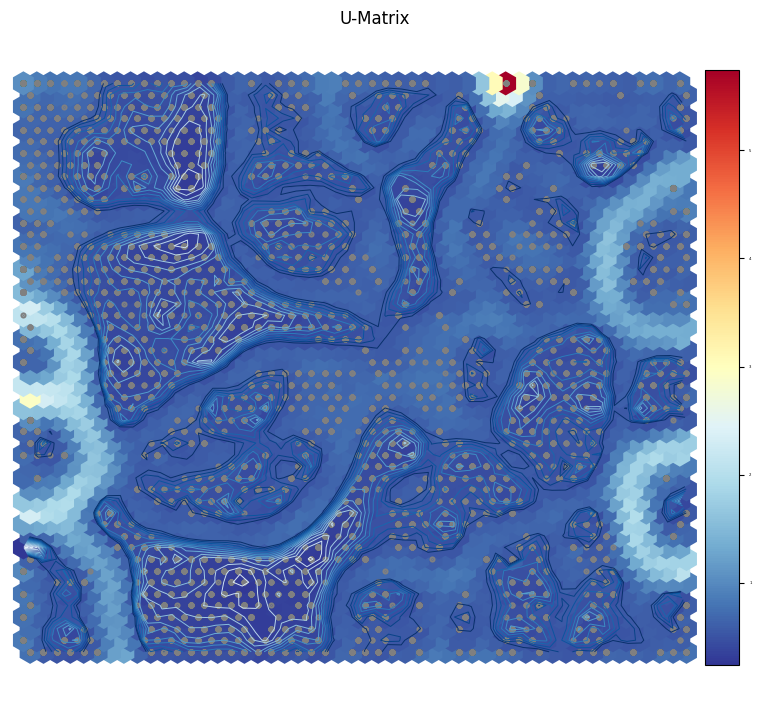

([],
 array([[0.71398564, 0.65780726, 0.73209018, ..., 0.79435409, 0.86386362,
         1.04132665],
        [0.62704866, 0.53196004, 0.60391516, ..., 0.71100586, 0.67097137,
         0.77153919],
        [0.51668822, 0.49923187, 0.60825345, ..., 0.68089088, 0.64650162,
         0.79364837],
        ...,
        [0.58024415, 0.53291805, 0.57400481, ..., 0.44092095, 0.54628102,
         0.73819815],
        [0.58985153, 0.6036509 , 0.59184918, ..., 0.47170995, 0.60640001,
         0.85810275],
        [0.75437403, 0.70362586, 0.73810366, ..., 0.51403874, 0.56361621,
         0.76148791]]))

In [37]:
from sompy.visualization.umatrix import UMatrixView

u_matrix = UMatrixView(width=10, height=10, title="U-Matrix")
u_matrix.show(sm, distance=2.0, row_normalized=False, show_data=True, contour=True)

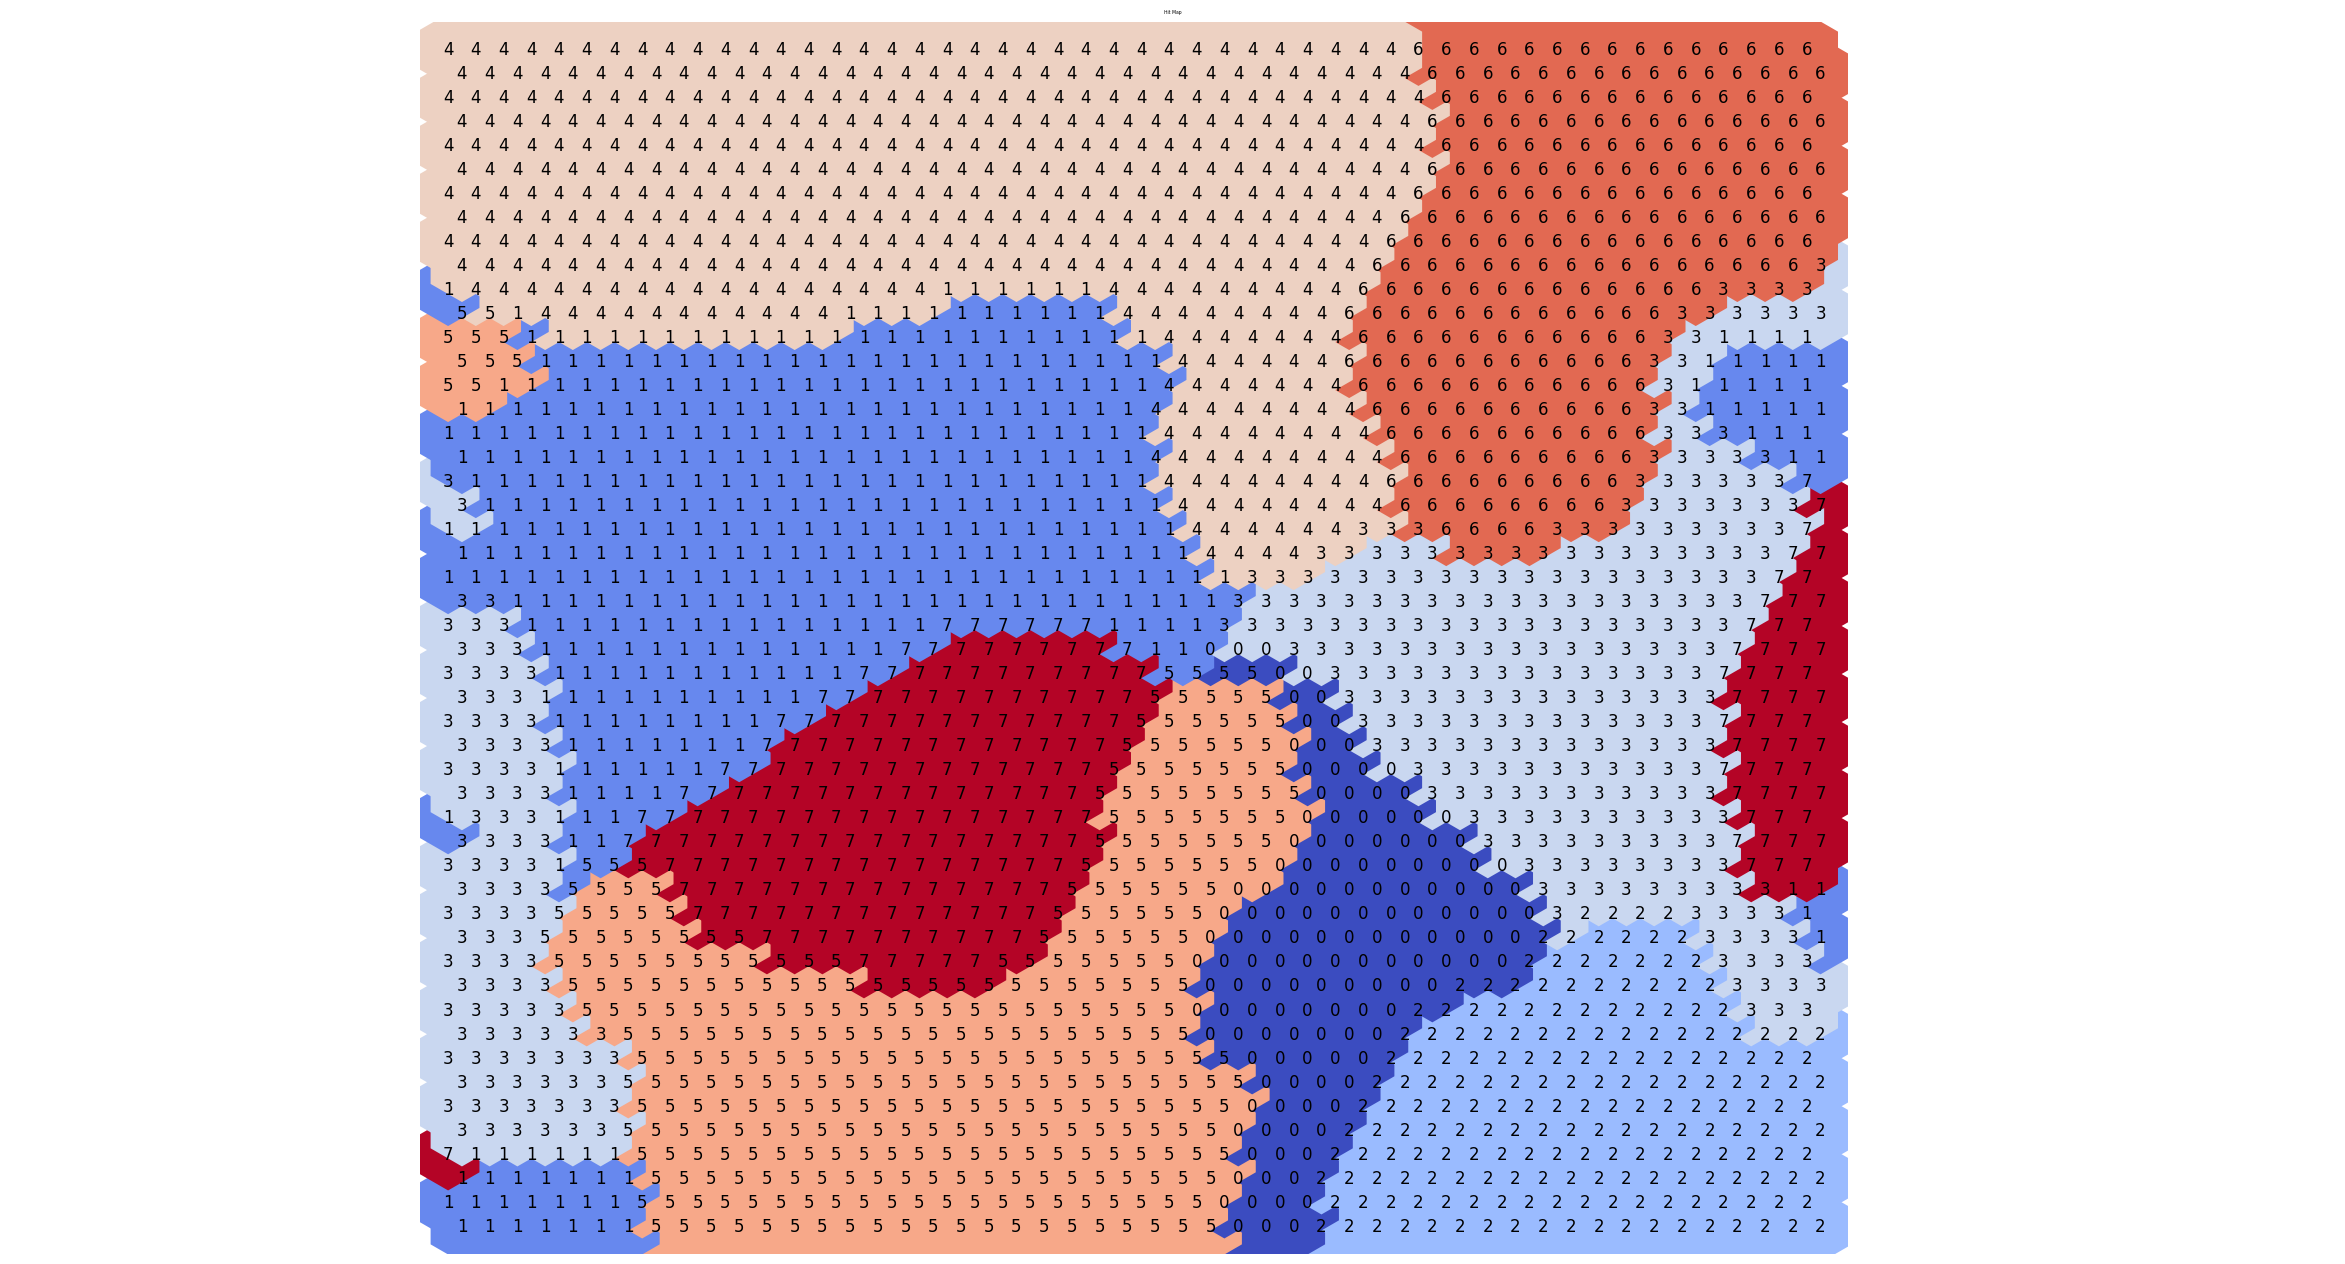

In [19]:
from sompy.visualization.hitmap import HitMapView

hits = HitMapView(30, 30, "Hit Map", text_size=12)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="coolwarm")

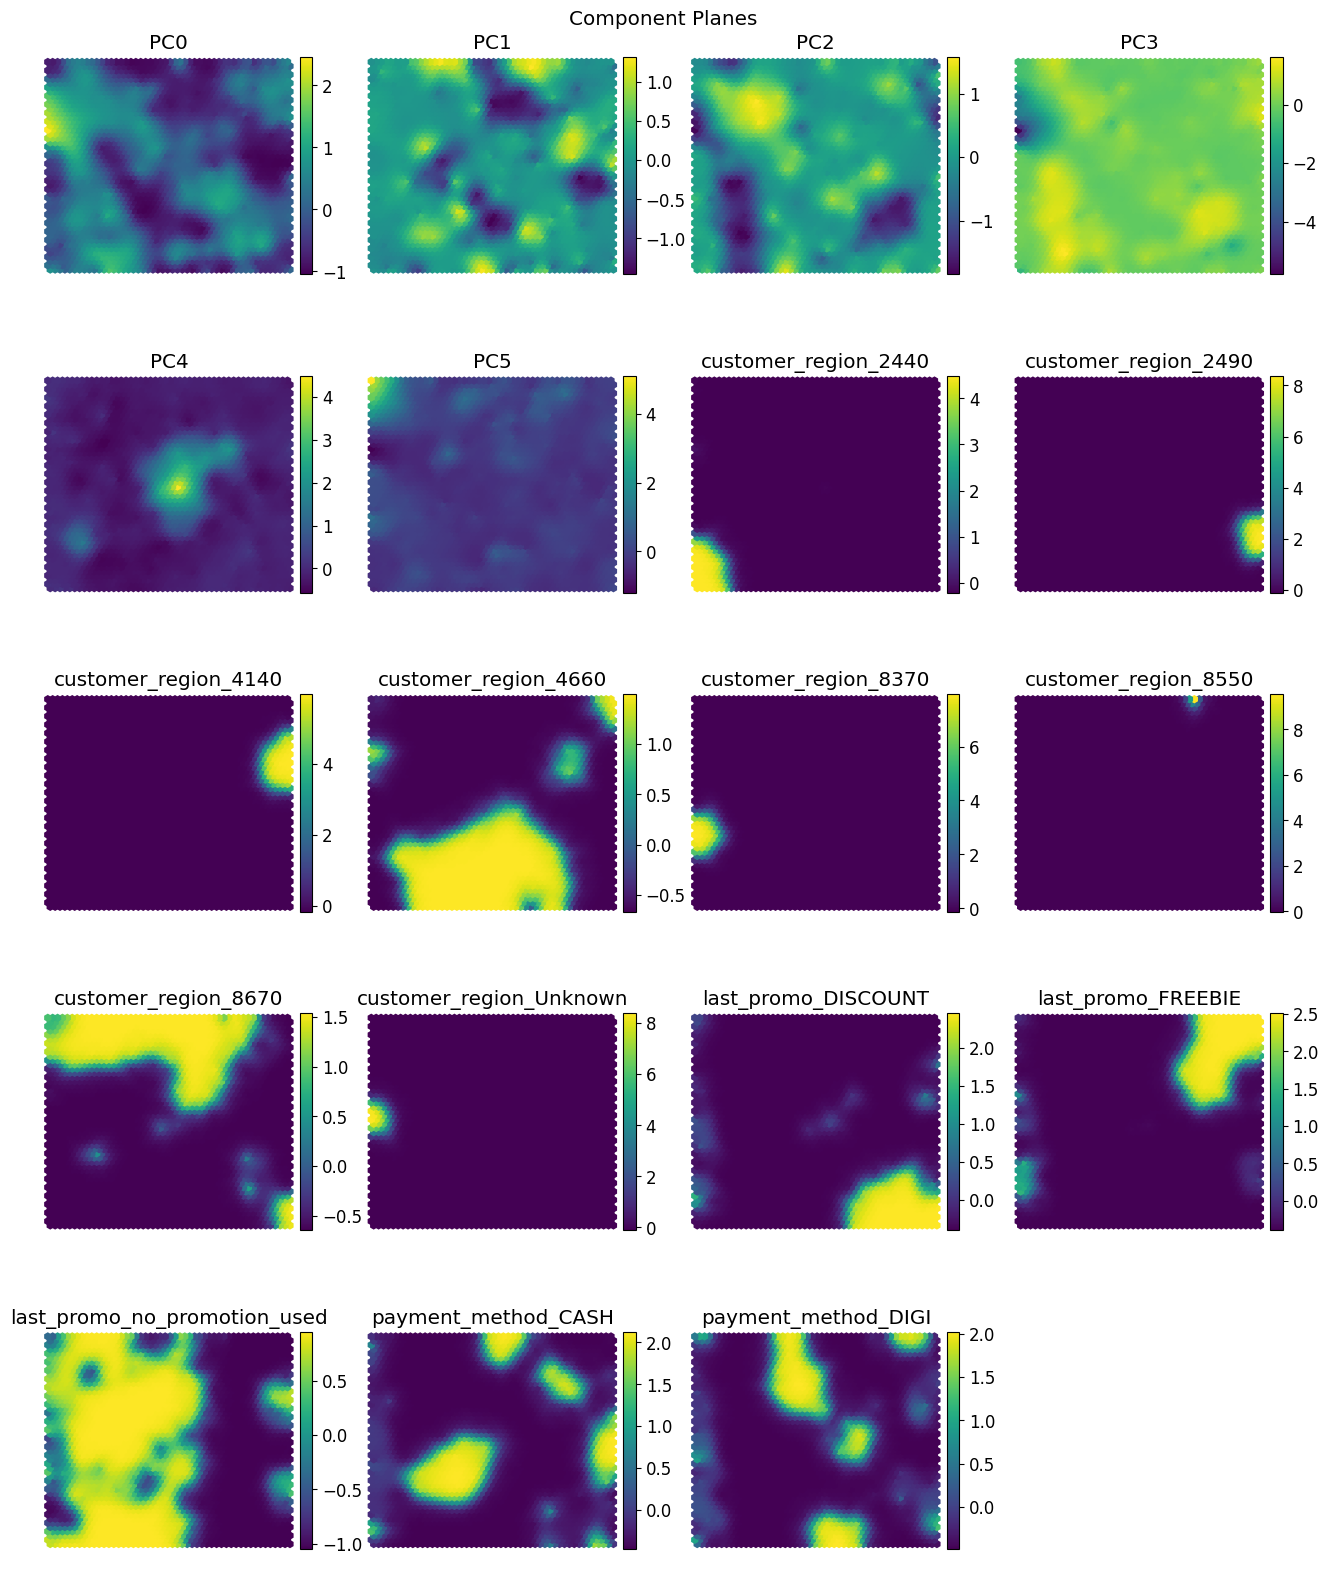

In [20]:
from sompy.visualization.mapview import View2D

view2d = View2D(30, 30, "Component Planes", text_size=12)
view2d.show(sm, col_sz=4, which_dim="all")

In [21]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_range = range(5, 10)

# Lists to store evaluation metrics
inertia = []
avg_silhouette = []
davies_bouldin_scores = []

# Iterate over the range of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
    cluster_labels = kmeans.fit_predict(sm.codebook.matrix)

    # Compute and store Inertia
    inertia.append(kmeans.inertia_)

    # Compute and store Average Silhouette Score
    silhouette_avg = silhouette_score(sm.codebook.matrix, cluster_labels)
    avg_silhouette.append(silhouette_avg)

    # Compute and store Davies-Bouldin Score
    db_score = davies_bouldin_score(sm.codebook.matrix, cluster_labels)
    davies_bouldin_scores.append(db_score)

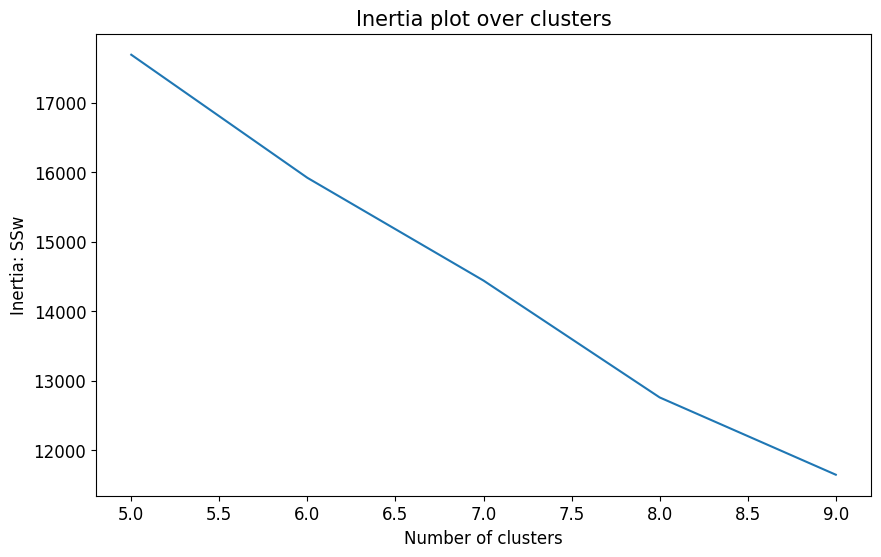

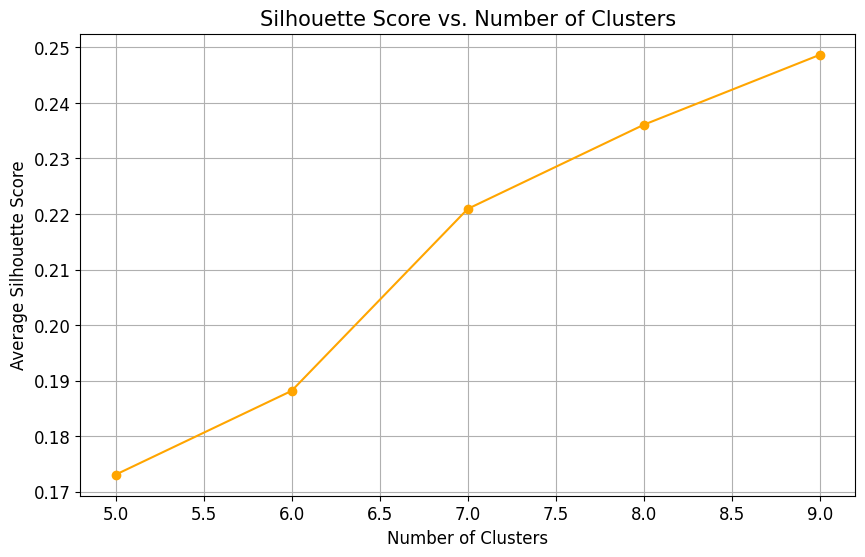

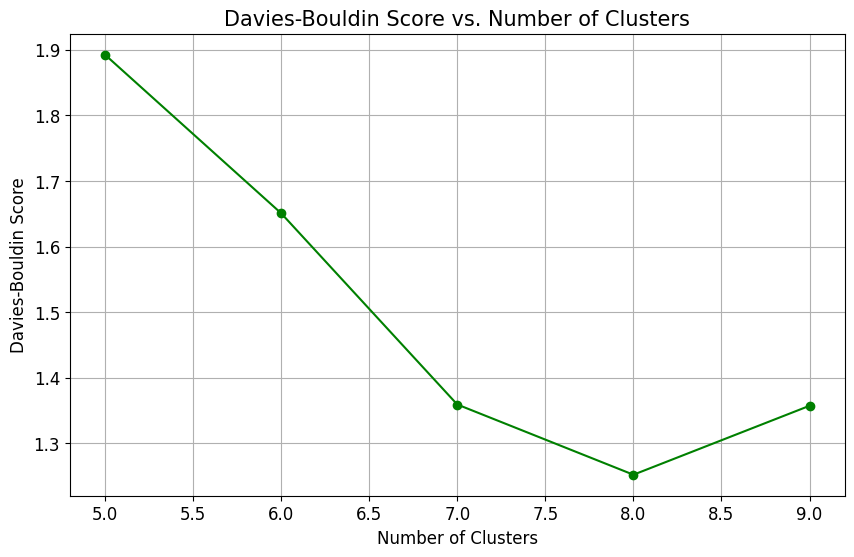

In [22]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

# Plot Average Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, avg_silhouette, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Average Silhouette Score", size=12)
plt.grid(True)
plt.show()

# Plot Davies-Bouldin Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, davies_bouldin_scores, marker='o', color='green')
plt.title("Davies-Bouldin Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Davies-Bouldin Score", size=12)
plt.grid(True)
plt.show()

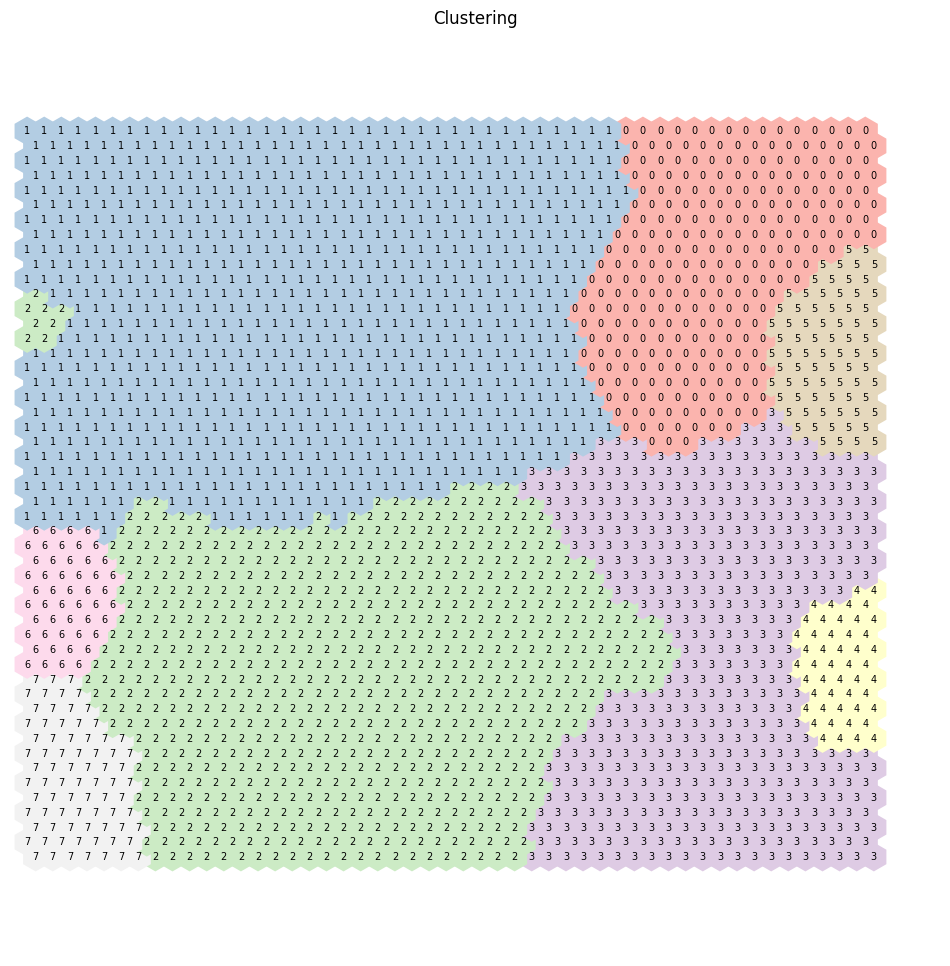

In [32]:
kmeans = KMeans(n_clusters=8, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [27]:
nodes = sm.codebook.matrix

df_nodes = pd.DataFrame(nodes, columns=df.columns)
df_nodes['label'] = nodeclus_labels
df_nodes

,PC0,PC1,PC2,PC3,PC4,PC5,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_no_promotion_used,payment_method_CASH,payment_method_DIGI,label
0,0.547117,0.001572,-0.978306,0.503129,-0.307404,-0.004053,-0.222479,-0.118485,-0.164245,1.447642,-0.124857,-0.019792,-0.641777,-0.116192,-0.405721,2.513964,-1.048396,-0.425161,-0.247014,0
1,0.387340,-0.034847,-0.703840,0.391918,-0.244629,-0.027439,-0.222479,-0.118485,-0.162865,1.344846,-0.124857,-0.019717,-0.626807,-0.116192,-0.405672,2.513796,-1.048345,-0.439181,0.366718,0
2,0.183644,-0.024475,-0.474725,0.300680,-0.166698,-0.050402,-0.222479,-0.118485,-0.163722,1.211769,-0.124857,-0.019601,-0.606844,-0.116192,-0.405718,2.513883,-1.048370,-0.454443,1.317917,0
3,-0.248908,-0.045591,-0.051388,0.052664,-0.150533,-0.090809,-0.222479,-0.118485,-0.164880,1.007363,-0.124857,-0.019397,-0.574825,-0.116192,-0.405768,2.513986,-1.048405,-0.460532,1.739666,0
4,-0.125526,-0.084176,0.038332,0.074425,-0.096541,-0.199887,-0.222479,-0.118485,-0.165022,0.220745,-0.124857,-0.018554,-0.441150,-0.116192,-0.405777,2.513867,-1.048389,-0.461409,1.807611,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.260915,0.077630,-0.132883,0.336057,0.081683,-0.116583,4.366912,-0.118485,-0.167103,-0.609994,-0.124804,-0.019822,-0.648526,-0.116192,-0.395986,-0.394104,0.906780,-0.425022,-0.397396,7
2496,0.031363,0.082527,0.340783,0.040907,0.034784,-0.151302,4.449596,-0.118485,-0.167103,-0.647925,-0.124806,-0.019822,-0.648527,-0.116192,-0.392250,-0.393486,0.899674,-0.402259,-0.381742,7
2497,0.294026,-0.122108,0.646099,-0.054991,0.180583,-0.281123,4.477015,-0.118485,-0.167103,-0.660503,-0.124806,-0.019822,-0.648527,-0.116192,-0.386390,-0.392697,0.884851,-0.363032,-0.300771,7
2498,0.540732,-0.104775,0.476572,-0.474861,0.132081,-0.387338,4.485870,-0.118485,-0.167103,-0.664568,-0.124796,-0.019822,-0.648527,-0.116192,-0.373028,-0.390917,0.839553,-0.277408,-0.038089,7


In [29]:
# Obtaining SOM's BMUs labels
bmus_map = sm.find_bmu(df)[0]  # get bmus for each observation in df

df_bmus = pd.DataFrame(
    np.concatenate((df, np.expand_dims(bmus_map,1)), axis=1),
    index=df.index, columns=np.append(df.columns,"BMU")
)
df_bmus

,PC0,PC1,PC2,PC3,PC4,PC5,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_no_promotion_used,payment_method_CASH,payment_method_DIGI,BMU
customer_id,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,0.136546,0.000247,0.588527,0.788868,0.054088,0.421970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1416.0
5d272b9dcb,0.136468,0.000000,0.591727,0.801303,0.036836,0.204790,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,484.0
f6d1b2ba63,0.214522,0.021476,0.295363,0.871453,0.354529,0.215721,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1983.0
180c632ed8,0.141770,0.006605,0.594165,0.797071,0.174897,0.281806,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2170.0
4eb37a6705,0.142061,0.006840,0.594022,0.787458,0.085230,0.445947,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2174.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,0.002551,0.108245,0.463875,0.748861,0.234421,0.188530,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1014.0
f6b6709018,0.002158,0.108192,0.463599,0.751306,0.173510,0.189226,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,333.0
f74ad8ce3f,0.001905,0.108170,0.466593,0.750733,0.143199,0.198787,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,333.0


In [35]:
# Get cluster labels for each observation
df_final = df_bmus.merge(df_nodes['label'], 'left', left_on="BMU", right_index=True)
df_final

,PC0,PC1,PC2,PC3,PC4,PC5,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,...,customer_region_8550,customer_region_8670,customer_region_Unknown,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_no_promotion_used,payment_method_CASH,payment_method_DIGI,BMU,label
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,0.136546,0.000247,0.588527,0.788868,0.054088,0.421970,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1416.0,3
5d272b9dcb,0.136468,0.000000,0.591727,0.801303,0.036836,0.204790,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,484.0,1
f6d1b2ba63,0.214522,0.021476,0.295363,0.871453,0.354529,0.215721,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1983.0,2
180c632ed8,0.141770,0.006605,0.594165,0.797071,0.174897,0.281806,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2170.0,2
4eb37a6705,0.142061,0.006840,0.594022,0.787458,0.085230,0.445947,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2174.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,0.002551,0.108245,0.463875,0.748861,0.234421,0.188530,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1014.0,0
f6b6709018,0.002158,0.108192,0.463599,0.751306,0.173510,0.189226,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,333.0,1
f74ad8ce3f,0.001905,0.108170,0.466593,0.750733,0.143199,0.198787,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,333.0,1


In [36]:
df_nodes['label'].value_counts()

,count
label,
1,853
2,675
3,456
0,267
5,76
7,76
6,49
4,48


In [31]:
df_final.drop(columns='BMU').groupby('label').mean()

,PC0,PC1,PC2,PC3,PC4,PC5,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_no_promotion_used,payment_method_CASH,payment_method_DIGI
label,,,,,,,,,,,,,,,,,,,
0,0.293164,0.523683,0.629816,0.821942,0.196015,0.258801,0.000485,0.021339,0.045102,0.000000,0.005820,0.001940,0.459263,0.022308,0.000000,0.997090,0.000000,0.251212,0.027158
1,0.303512,0.515014,0.655738,0.820822,0.192177,0.265697,0.047643,0.016704,0.035179,0.000000,0.017210,0.000253,0.509143,0.019424,0.115090,0.034989,0.658020,0.208984,0.195951
2,0.333686,0.528881,0.596644,0.832547,0.197353,0.244100,0.030215,0.000214,0.000536,0.947391,0.013072,0.000000,0.000000,0.000000,0.086467,0.121076,0.600021,0.159649,0.147862
3,0.269450,0.527044,0.588101,0.821011,0.191213,0.234305,0.030253,0.037159,0.057876,0.196646,0.020717,0.001315,0.017100,0.017757,0.518251,0.078921,0.000000,0.019402,0.420256
7,0.302310,0.510507,0.673559,0.824325,0.174787,0.230522,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.380192,0.619808,0.000000,0.191693,0.166134


In [40]:
df_final['label'].value_counts()

,count
label,
1,15805
2,9333
3,3041
0,2062
7,313


In [42]:
df_clean=pd.read_csv('df_Clean.csv',delimiter=',')

In [47]:
df_clean_numeric = df_clean.select_dtypes(include=['number'])

# Add the 'label' column from df_final
df_concat = pd.concat(
    [df_clean_numeric, pd.Series(df_final['label'].values, name='label', index=df_clean.index)],
    axis=1
)

# Group by 'label' and calculate the mean
cluster_means = df_concat.groupby('label').mean()
cluster_means

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_22,HR_23,Total_Spent,order_count,Diversity_Cuisine,costumer_time,Intensity_of_Activity,Customer_loyalty,product_intensity,Day_Week_Spread
label,,,,,,,,,,,,,,,,,,,,,
0,27.615907,3.079534,5.408341,2.870514,30.403492,62.537827,3.409869,11.807968,3.330980,0.148889,...,0.048012,0.042677,35.912939,4.125121,1.778162,32.134336,7.968463,0.853934,1.310248,0.695118
1,27.341158,3.179374,5.459538,2.827396,28.149320,63.253591,3.905601,12.525487,3.490659,0.128356,...,0.047327,0.041316,38.277670,4.099779,1.711972,35.104271,8.816072,0.878924,1.344660,0.672385
2,27.747991,2.874638,5.789778,2.474124,27.576021,65.346941,7.128902,5.734052,0.111712,2.186643,...,0.025715,0.015429,40.688708,4.644809,1.991641,37.770920,8.725474,0.773136,1.239088,0.797865
3,27.346597,2.793160,5.260441,3.189411,33.614929,60.067412,2.845524,2.563275,1.579191,0.556363,...,0.056889,0.040118,23.562937,4.200921,1.737149,26.452483,5.521328,0.825034,1.234576,0.695448
7,26.223642,3.194888,4.811502,3.290735,27.389776,63.444089,1.676581,1.220703,1.455527,0.303163,...,0.089457,0.035144,16.599201,3.888179,1.451241,36.054313,8.957007,0.901641,1.222845,0.677316


In [49]:
cluster_means = df_concat.groupby('label').mean().T
cluster_means.style.format(precision=2).background_gradient(axis=1)

label,0,1,2,3,7
customer_age,27.62,27.34,27.75,27.35,26.22
vendor_count,3.08,3.18,2.87,2.79,3.19
product_count,5.41,5.46,5.79,5.26,4.81
is_chain,2.87,2.83,2.47,3.19,3.29
first_order,30.40,28.15,27.58,33.61,27.39
last_order,62.54,63.25,65.35,60.07,63.44
CUI_American,3.41,3.91,7.13,2.85,1.68
CUI_Asian,11.81,12.53,5.73,2.56,1.22
CUI_Beverages,3.33,3.49,0.11,1.58,1.46
CUI_Cafe,0.15,0.13,2.19,0.56,0.30


In [52]:
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_final[metric_features])  # get total sum of squares
ssw_labels = df_final[metric_features.to_list() + ["label"]].groupby(by='label').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
r2

AttributeError: 'DataFrame' object has no attribute 'to_list'